# Project: Titanic - Machine Learning from Disaster

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
train_df = pd.read_csv("./Data/train.csv", index_col="PassengerId")
test_df = pd.read_csv("./Data/test.csv", index_col="PassengerId")

In [161]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [162]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Notes**:
- `SibSp`: # of siblings / spouses aboard the Titanic
- `Parch`: # of parents / children aboard the Titanic
- `Ticket`: Ticket number
- `Cabin`: Cabin number

In [163]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature Classification: Categorical & Numerical
- This helps us select the appropriate plots for visualization

**Which features are categorical?**
- Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`
- To classify the samples into sets of similar samples

**Which features are numerical?**
- Numerical Features: `discrete`, `continuous`, `timeseries`
- These values change from sample to sample

In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- **Categorical**: `Survived`, `Sex`, `Embarked`, `Pclass` (ordinal), `SibSp`, `Parch`
- **Numerical**: `Age` (continuous), `Fare` (discrete)
- **Mix types of data**: `Ticket`, `Cabin`
- **Blank or NULL**: `Cabin` > `Age` > `Embarked`
- **Various type data**: String, Int, Float

In [166]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [167]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

In [168]:
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

In [169]:
convert_cat(train_df, features)
convert_cat(test_df, features)

In [170]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


**Distribution of numerical features**

In [171]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Distribution of categorical features**

In [172]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 2. Exploratory Data Analysis (EDA)

### **2.1 EDA for Categorical Features**

**Correlating categorical features**
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`, `Parch`, `SibSp`

**Target Variable: `Survived`**

In [173]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]

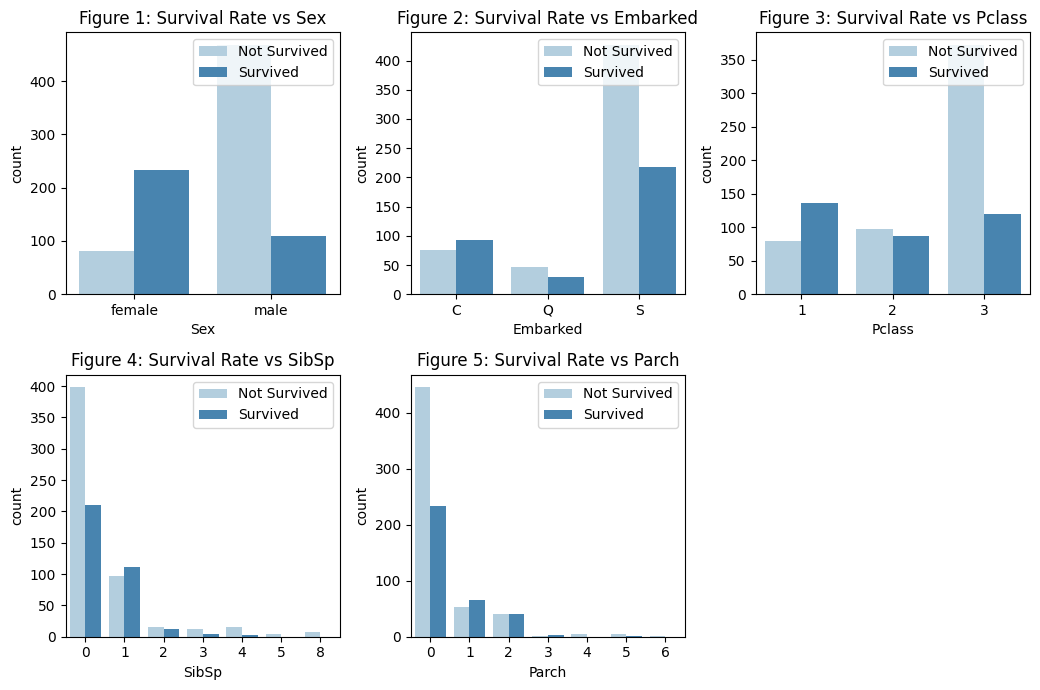

In [174]:
nrows, ncols = 2, 3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3.5, nrows * 3.5))

for r in range(nrows):
    for c in range(ncols):
        i = r * ncols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(
                data=train_df, x=cols[i], hue="Survived", palette="Blues", ax=ax_i
            )
            ax_i.set_title("Figure {}: Survival Rate vs {}".format(i + 1, cols[i]))
            ax_i.legend(
                title="", loc="upper right", labels=["Not Survived", "Survived"]
            )

ax.flat[-1].set_visible(False)
plt.tight_layout()

**Observation**:
- **Survival Rate**:
    - Fig 1: Females have a higher survival rate than males.
    - Fig 2: Most people embarked at Southampton, which also had the highest number of people who did not survive.
    - Fig 3: Passengers in 1st class had a higher survival rate.
    - Fig 4: People with 0 siblings or spouses (`SibSp`) mostly did not survive. Passengers with 1-2 family members had a better chance of survival.
    - Fig 5: People with 0 parents or children (`Parch`) mostly did not survive.

### **2.2 EDA for Numerical Features**

**Correlating numerical features**
- Numerical: `Age`, `Fare`

***Age***

<Axes: xlabel='Age', ylabel='Count'>

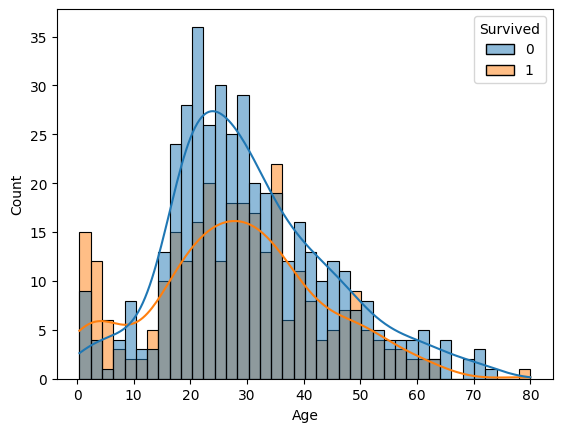

In [175]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=40, kde=True)

***Fare***

In [176]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

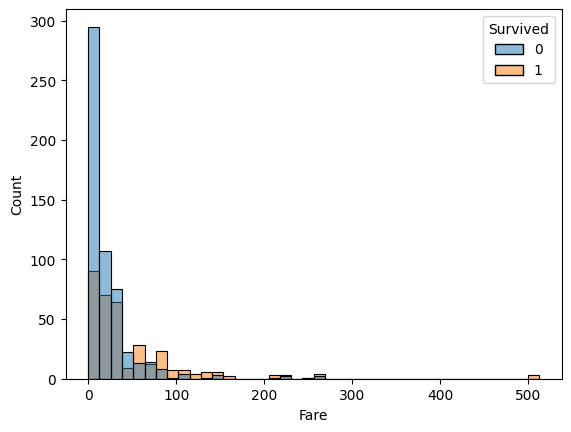

In [177]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=40)

In [178]:
fare_categories = ["Economics", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)

In [179]:
quartile_data

PassengerId
1      Economics
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891    Economics
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economics' < 'Standard' < 'Expensive' < 'Luxury']

<Axes: xlabel='Fare', ylabel='count'>

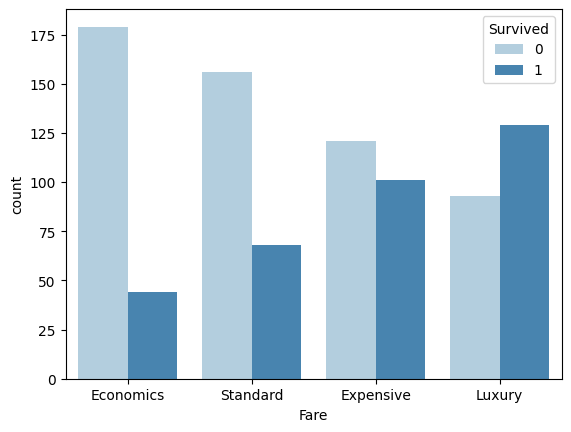

In [180]:
sns.countplot(x=quartile_data, hue=train_df["Survived"], palette="Blues")

## 3. Feature Engineering & Data Wrangling

### **3.1 Feature Engineering**

***Name***

In [181]:
train_df["Name"].head(10)

PassengerId
1                               Braund, Mr. Owen Harris
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                Heikkinen, Miss. Laina
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                              Allen, Mr. William Henry
6                                      Moran, Mr. James
7                               McCarthy, Mr. Timothy J
8                        Palsson, Master. Gosta Leonard
9     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [182]:
def extract_title(name):
    title = ""
    is_title = False
    for char in name:
        if char == ",":
            is_title = True
        elif char == ".":
            break
        if is_title and char != ",":
            title += char
    return title.strip()

In [183]:
train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [184]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [185]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))

In [186]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [187]:
def group_title(title):
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

In [188]:
train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

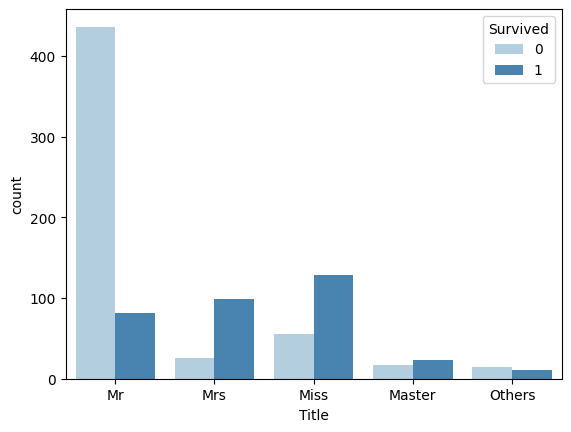

In [189]:
sns.countplot(data=train_df, x="Title", hue="Survived", palette="Blues")

In [190]:
train_df["Family_Size"] = (
    train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") + 1
)

In [191]:
test_df["Family_Size"] = (
    test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") + 1
)

In [192]:
train_df["Family_Cat"] = pd.cut(
    train_df["Family_Size"],
    bins=[0, 1, 4, 6, 20],
    labels=["Solo", "Small", "Medium", "Large"],
)

In [193]:
test_df["Family_Cat"] = pd.cut(
    test_df["Family_Size"],
    bins=[0, 1, 4, 6, 20],
    labels=["Solo", "Small", "Medium", "Large"],
)

<Axes: xlabel='Family_Cat', ylabel='count'>

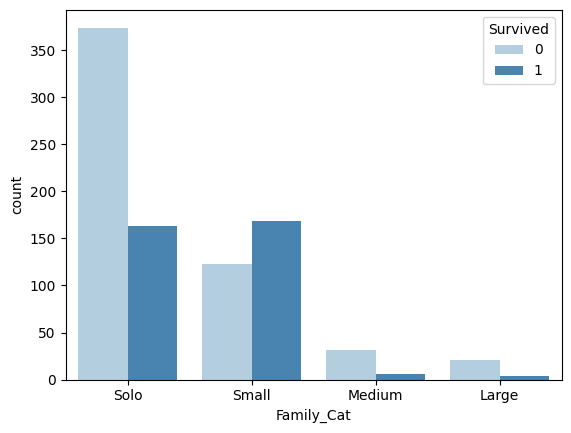

In [194]:
sns.countplot(data=train_df, x="Family_Cat", hue="Survived", palette="Blues")

### **3.2 Data Wrangling**

In [195]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Embarked", "Title", "Family_Cat"]
feature_cols = num_features + cat_features

In [196]:
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [197]:
def display_missing(df, feature_cols):
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(
                "{} has {} % missing values".format(
                    col, missing_count * 100 / df.shape[0]
                )
            )

In [198]:
display_missing(train_df, feature_cols)

Age has 19.865319865319865 % missing values
Embarked has 0.2244668911335578 % missing values


In [199]:
display_missing(test_df, feature_cols)

Age has 20.574162679425836 % missing values
Fare has 0.23923444976076555 % missing values


**Filling missing values**

***Age***
- Filling missing values with `median` of whole dataset

In [200]:
age_by_sex_pclass = train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].median()

In [201]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [202]:
train_df["Age"] = train_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(
    lambda x: x.fillna(x.median())
)
test_df["Age"] = test_df.groupby(["Sex", "Pclass"], observed=False)["Age"].transform(
    lambda x: x.fillna(x.median())
)

In [203]:
display_missing(train_df, feature_cols)

Embarked has 0.2244668911335578 % missing values


In [204]:
display_missing(test_df, feature_cols)

Fare has 0.23923444976076555 % missing values


In [205]:
X = train_df[feature_cols]
y = train_df["Survived"]

In [206]:
X_test = test_df[feature_cols]

In [207]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [208]:
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [209]:
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [210]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

In [211]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [212]:
X = preprocessor.transform(X)  # X -> X_train, X_val

In [213]:
X_test = preprocessor.transform(X_test)

## 4. Model Training

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [216]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [217]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
)

In [218]:
log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [219]:
log_reg.score(X_val, y_val)

0.8547486033519553

In [220]:
y_pred = log_reg.predict(X_val)

In [221]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.819672131147541, 0.7692307692307693)

In [222]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       114
           1       0.82      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [223]:
poly = PolynomialFeatures(degree=4)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [224]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [225]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8379888268156425

In [226]:
decision_tree = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, random_state=2022
)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [227]:
decision_tree.score(X_val, y_val)

0.8156424581005587

### **4.1 Cross-Validation**

In [228]:
from sklearn.model_selection import cross_val_score

In [229]:
log_reg_cv = LogisticRegression(solver="liblinear", max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=2022)
lr_scores = cross_val_score(log_reg_cv, X, y, scoring="accuracy", cv=5)

In [230]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [231]:
dt_scores = cross_val_score(dt_cv, X, y, scoring="accuracy", cv=5)

In [232]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

### **5.2 Baseline Model Comparison**

In [233]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
)
from xgboost import XGBClassifier

seed = 2024

models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric="minkowski", p=2),
    LogisticRegression(solver="liblinear", max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm="SAMME"),
    XGBClassifier(eval_metric="logloss", random_state=seed),
]

In [234]:
from sklearn.model_selection import StratifiedKFold

In [235]:
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "accuracy_score"])

    if plot_results:
        sns.boxplot(
            x="model_name",
            y="accuracy_score",
            data=cv_df,
            color="lightblue",
            showmeans=True,
        )
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ["Mean", "Standard Deviation"]

    return baseline_results

In [236]:
generate_baseline_results(models, X, y, metrics="accuracy", cv=5, plot_results=False)

,Mean,Standard Deviation
model_name,,
AdaBoostClassifier,0.820470,0.026794
DecisionTreeClassifier,0.763198,0.025431
ExtraTreesClassifier,0.795801,0.036375
KNeighborsClassifier,0.818222,0.030301
LinearSVC,0.829439,0.030381
LogisticRegression,0.830557,0.027082
RandomForestClassifier,0.806986,0.023033
SVC,0.828310,0.022386
XGBClassifier,0.809240,0.024706


In [237]:
best_model = LogisticRegression(solver="liblinear", max_iter=1000)
best_model.fit(X, y)

y_pred = best_model.predict(X_test)

submission = pd.DataFrame({"PassengerId": test_df.index, "Survived": y_pred})
submission.to_csv("submission.csv", index=False)